In [47]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df = pd.read_csv('OLA_Dataset.csv')
df.head(3)

,booking id,booking_date_time,gender,month,day_of_week,time_of_day,distance_travelled,time_taken,reason,toll,category,commission_base_cost,driver_base_cost,total_tax,total_trip_cost,ratings
0,1890061540,43249.91944,Male,May,Tue,0.919444,17,58.0,Office to/from Home,0,Mini,57.73,230.91,21.94,311.00,3
1,1542148932,43153.92500,Female,February,Thu,0.925000,18,43.0,Late Night Ride,0,Mini,52.04,208.16,19.76,279.96,5
2,1672692603,43194.88264,Female,April,Wed,0.882639,2,5.0,Office to/from Home,0,Prime,19.70,78.81,7.49,106.00,5


In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4950 entries, 0 to 4949
Data columns (total 16 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   booking id            4950 non-null   object 
 1   booking_date_time     4950 non-null   float64
 2   gender                4950 non-null   object 
 3   month                 4950 non-null   object 
 4   day_of_week           4950 non-null   object 
 5   time_of_day           4950 non-null   float64
 6   distance_travelled    4950 non-null   int64  
 7   time_taken            4950 non-null   float64
 8   reason                4857 non-null   object 
 9   toll                  4950 non-null   int64  
 10  category              4950 non-null   object 
 11  commission_base_cost  4950 non-null   float64
 12  driver_base_cost      4950 non-null   float64
 13  total_tax             4950 non-null   float64
 14  total_trip_cost       4950 non-null   float64
 15  ratings              

In [50]:
df['reason'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
4945    False
4946    False
4947    False
4948    False
4949    False
Name: reason, Length: 4950, dtype: bool

In [51]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
booking_date_time,4950.0,43195.816098,53.621694,43101.04306,43147.922225,43195.875,43245.182465,43281.198610
time_of_day,4950.0,0.686199,0.373218,0.00000,0.273090,0.900,0.936806,0.999306
distance_travelled,4950.0,11.713333,10.338660,0.00000,4.000000,8.500,16.000000,66.000000
time_taken,4950.0,35.126137,25.592958,0.00000,7.000000,35.000,50.000000,192.000000
toll,4950.0,5.408081,15.915681,0.00000,0.000000,0.000,0.000000,140.000000
commission_base_cost,4950.0,47.598505,37.155192,0.00000,22.625000,37.615,58.517500,359.240000
driver_base_cost,4950.0,196.162053,155.368659,26.02000,90.865000,151.145,242.680000,1369.600000
total_tax,4950.0,18.381004,14.408632,2.47000,8.620000,14.355,22.687500,129.120000
total_trip_cost,4950.0,262.074463,206.440318,34.00000,122.000000,203.000,324.750000,1828.120000
ratings,4950.0,3.734949,1.172378,1.00000,3.000000,4.000,5.000000,5.000000


In [52]:
df.isnull().sum()

booking id               0
booking_date_time        0
gender                   0
month                    0
day_of_week              0
time_of_day              0
distance_travelled       0
time_taken               0
reason                  93
toll                     0
category                 0
commission_base_cost     0
driver_base_cost         0
total_tax                0
total_trip_cost          0
ratings                  0
dtype: int64

In [53]:
ndf = df[~df['reason'].isnull()]
ndf.isnull().sum()

booking id              0
booking_date_time       0
gender                  0
month                   0
day_of_week             0
time_of_day             0
distance_travelled      0
time_taken              0
reason                  0
toll                    0
category                0
commission_base_cost    0
driver_base_cost        0
total_tax               0
total_trip_cost         0
ratings                 0
dtype: int64

In [54]:
df = df.fillna('None')

In [55]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
booking_date_time,4950.0,43195.816098,53.621694,43101.04306,43147.922225,43195.875,43245.182465,43281.198610
time_of_day,4950.0,0.686199,0.373218,0.00000,0.273090,0.900,0.936806,0.999306
distance_travelled,4950.0,11.713333,10.338660,0.00000,4.000000,8.500,16.000000,66.000000
time_taken,4950.0,35.126137,25.592958,0.00000,7.000000,35.000,50.000000,192.000000
toll,4950.0,5.408081,15.915681,0.00000,0.000000,0.000,0.000000,140.000000
commission_base_cost,4950.0,47.598505,37.155192,0.00000,22.625000,37.615,58.517500,359.240000
driver_base_cost,4950.0,196.162053,155.368659,26.02000,90.865000,151.145,242.680000,1369.600000
total_tax,4950.0,18.381004,14.408632,2.47000,8.620000,14.355,22.687500,129.120000
total_trip_cost,4950.0,262.074463,206.440318,34.00000,122.000000,203.000,324.750000,1828.120000
ratings,4950.0,3.734949,1.172378,1.00000,3.000000,4.000,5.000000,5.000000


<AxesSubplot:>

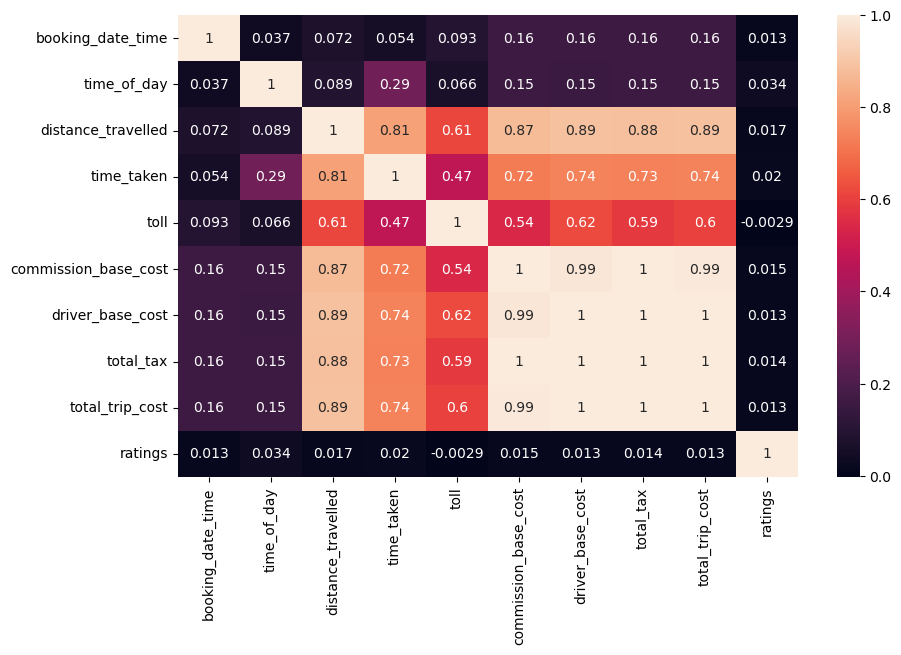

In [56]:
# Correlation of the dataset
correlation = df.corr()
fig = plt.figure(figsize=(10,6))
sns.heatmap(correlation,annot = True)

## Demogrphic analysis with visualization

In [57]:
# assigning category based on distance
def setCategeory(distance) :
    if distance < 3 :
        return 'Small Distance'
    elif distance < 6 :
        return 'Medium Distance'
    elif distance < 10  : 
        return 'Long Distance'
    else :
        return 'Super Long Distance'

df['categeory_based_on_distance'] = df['distance_travelled'].apply(lambda value : setCategeory(value))

In [58]:
df.head(3)

,booking id,booking_date_time,gender,month,day_of_week,time_of_day,distance_travelled,time_taken,reason,toll,category,commission_base_cost,driver_base_cost,total_tax,total_trip_cost,ratings,categeory_based_on_distance
0,1890061540,43249.91944,Male,May,Tue,0.919444,17,58.0,Office to/from Home,0,Mini,57.73,230.91,21.94,311.00,3,Super Long Distance
1,1542148932,43153.92500,Female,February,Thu,0.925000,18,43.0,Late Night Ride,0,Mini,52.04,208.16,19.76,279.96,5,Super Long Distance
2,1672692603,43194.88264,Female,April,Wed,0.882639,2,5.0,Office to/from Home,0,Prime,19.70,78.81,7.49,106.00,5,Small Distance


In [59]:
df['categeory_based_on_distance'].value_counts()

Super Long Distance    2323
Medium Distance        1017
Long Distance           885
Small Distance          725
Name: categeory_based_on_distance, dtype: int64

[Text(0.5, 0, 'Gender'), Text(0, 0.5, 'Count')]

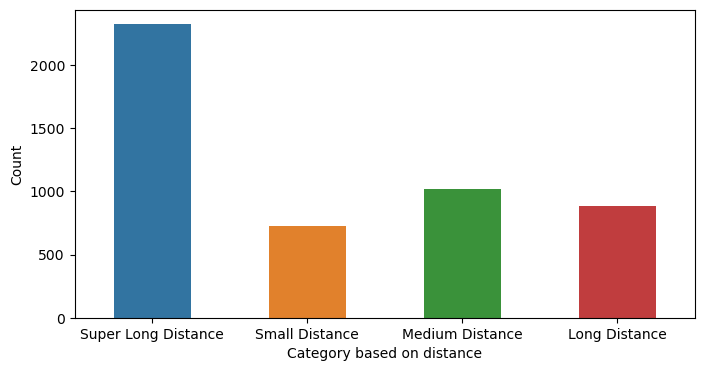

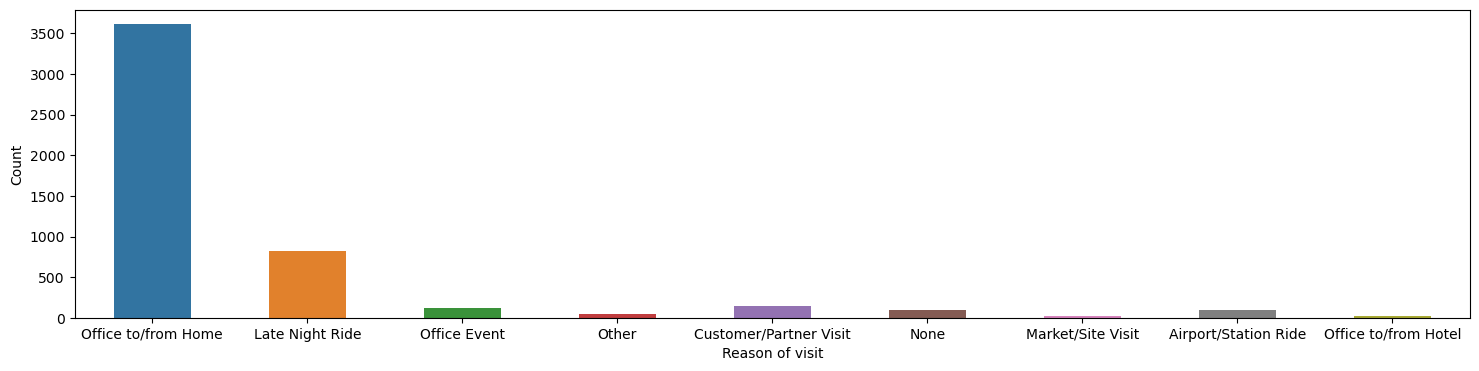

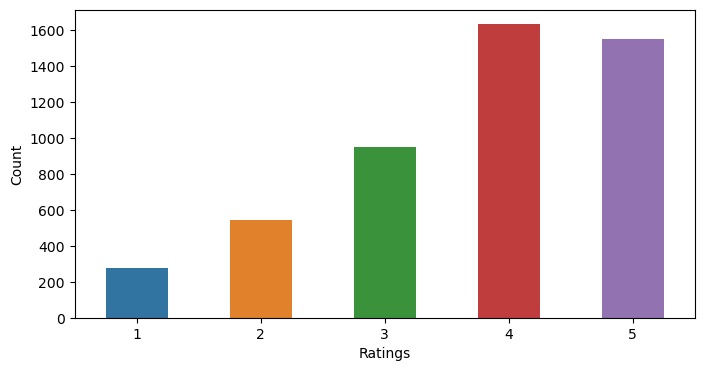

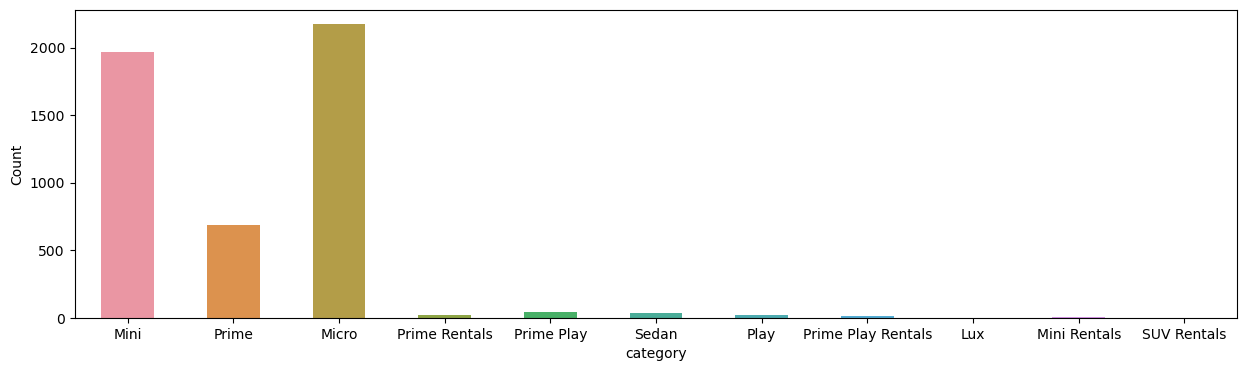

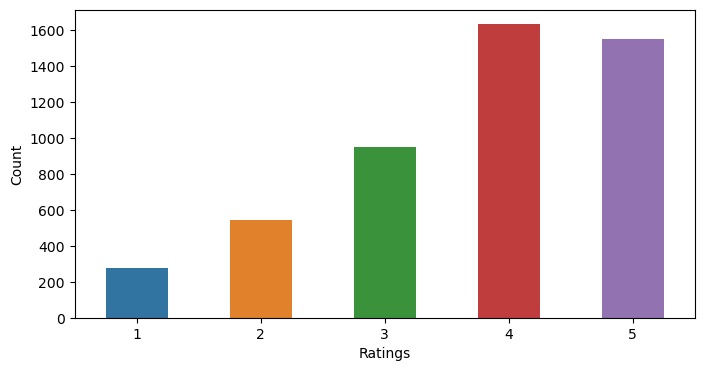

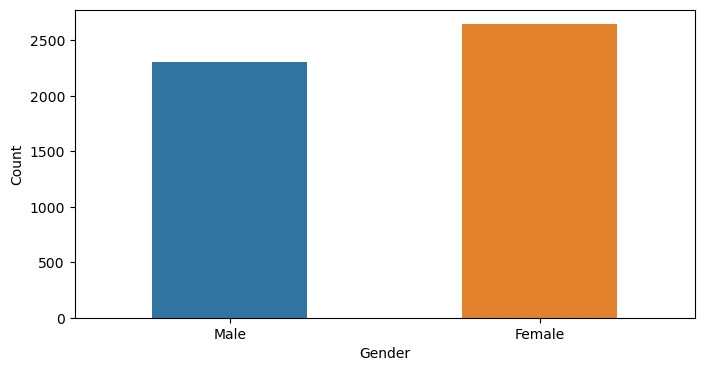

In [60]:
# Analysis of different demographic aspects of the data

plt.figure(figsize=(8,4))
fig1 = sns.countplot(data=df, x= 'categeory_based_on_distance',width=0.5)
fig1.set(xlabel = 'Category based on distance', ylabel = 'Count')

plt.figure(figsize=(18,4))
fig2 = sns.countplot(data=df, x= 'reason',width=0.5)
fig2.set(xlabel = 'Reason of visit', ylabel = 'Count')

plt.figure(figsize=(8,4))
fig3 = sns.countplot(data=df, x= 'ratings',width=0.5)
fig3.set(xlabel = 'Ratings', ylabel = 'Count')

plt.figure(figsize=(15,4))
fig5 = sns.countplot(data=df, x= 'category',width=0.5)
fig5.set(xlabel = 'category', ylabel = 'Count')

plt.figure(figsize=(8,4))
fig6 = sns.countplot(data=df, x= 'ratings',width=0.5)
fig6.set(xlabel = 'Ratings', ylabel = 'Count')

plt.figure(figsize=(8,4))
fig7 = sns.countplot(data=df, x= 'gender',width=0.5)
fig7.set(xlabel = 'Gender', ylabel = 'Count')



<Figure size 1000x600 with 0 Axes>

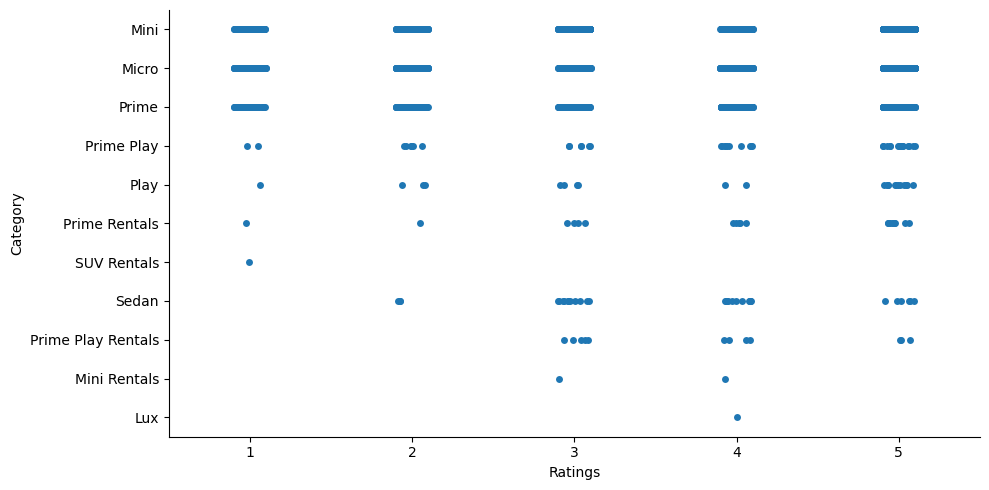

In [61]:
# Plot for Ratings X Category
fig8 = plt.figure(figsize=(10,6))
fig8 = sns.catplot(data=df, x="ratings", y="category", orient="v", height=5, aspect=2)
fig8.set(xlabel = 'Ratings', ylabel = 'Category')

### Modifiying data for clustering

In [62]:
from sklearn.preprocessing import LabelEncoder

df.replace(to_replace = 'NaN',value = 'none')

,booking id,booking_date_time,gender,month,day_of_week,time_of_day,distance_travelled,time_taken,reason,toll,category,commission_base_cost,driver_base_cost,total_tax,total_trip_cost,ratings,categeory_based_on_distance
0,1890061540,43249.91944,Male,May,Tue,0.919444,17,58.00,Office to/from Home,0,Mini,57.73,230.91,21.94,311.00,3,Super Long Distance
1,1542148932,43153.92500,Female,February,Thu,0.925000,18,43.00,Late Night Ride,0,Mini,52.04,208.16,19.76,279.96,5,Super Long Distance
2,1672692603,43194.88264,Female,April,Wed,0.882639,2,5.00,Office to/from Home,0,Prime,19.70,78.81,7.49,106.00,5,Small Distance
3,1925600201,43258.93264,Female,June,Thu,0.932639,15,49.00,Office to/from Home,35,Micro,51.24,239.96,21.22,312.00,5,Super Long Distance
4,1530845664,43150.47986,Male,February,Mon,0.479861,46,0.00,Office Event,0,Prime Rentals,195.92,783.68,74.45,1054.05,4,Super Long Distance
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4945,1901877370,43252.90972,Female,June,Fri,0.909722,29,90.00,Office to/from Home,35,Micro,113.75,490.02,44.97,649.00,3,Super Long Distance
4946,1867091987,43243.93333,Female,May,Wed,0.933333,1,2.00,Office to/from Home,0,Mini,15.84,63.36,6.02,85.00,4,Small Distance
4947,1747322670,43214.97153,Male,April,Tue,0.971528,8,34.00,Office to/from Home,0,Mini,33.78,135.13,12.84,182.00,5,Long Distance
4948,1635338680,43183.00833,Male,March,Sat,0.008333,10,30.00,Office to/from Home,0,Prime,43.29,173.17,16.45,232.91,5,Super Long Distance


In [63]:
df['reason'].value_counts()

Office to/from Home       3612
Late Night Ride            822
Customer/Partner Visit     142
Office Event               116
None                        93
Airport/Station Ride        89
Other                       42
Market/Site Visit           18
Office to/from Hotel        16
Name: reason, dtype: int64

In [64]:
df['reason'].unique()

array(['Office to/from Home', 'Late Night Ride', 'Office Event', 'Other',
       'Customer/Partner Visit', 'None', 'Market/Site Visit',
       'Airport/Station Ride', 'Office to/from Hotel'], dtype=object)

In [65]:
# Encoding for Reason column
lc = LabelEncoder()
lc.fit_transform([i for i in df['reason'].unique()])
df['reason'] = df['reason'].map({'Office to/from Home' :0, 'Late Night Ride':1 , 'Office Event' :2, 'Other' :3,
       'Customer/Partner Visit' :4, 'None' :5, 'Market/Site Visit' :6,
       'Airport/Station Ride' :7, 'Office to/from Hotel':8})

In [66]:
df['categeory_based_on_distance'].unique()

array(['Super Long Distance', 'Small Distance', 'Medium Distance',
       'Long Distance'], dtype=object)

In [67]:
# Encoding for category based distance
lc.fit_transform([i for i in df['categeory_based_on_distance'].unique()])
df['categeory_based_on_distance'] = df['categeory_based_on_distance'].map({'Super Long Distance' : 0, 'Small Distance':1 , 'Medium Distance' :2,
       'Long Distance' :3})

In [68]:
df['category'].unique()

array(['Mini', 'Prime', 'Micro', 'Prime Rentals', 'Prime Play', 'Sedan',
       'Play', 'Prime Play Rentals', 'Lux', 'Mini Rentals', 'SUV Rentals'],
      dtype=object)

In [69]:
lc.fit_transform([i for i in df['category'].unique()])
df['category'] = df['category'].map({'Mini' :0, 'Prime':1, 'Micro':2, 'Prime Rentals':3, 'Prime Play':4, 'Sedan':5,
       'Play':6, 'Prime Play Rentals':7, 'Lux':8, 'Mini Rentals':9, 'SUV Rentals':10})

In [70]:
# Clustering dataset
cl_df = df[['categeory_based_on_distance', 'reason', 'category']]
cl_df

,categeory_based_on_distance,reason,category
0,0,0,0
1,0,1,0
2,1,0,1
3,0,0,2
4,0,2,3
...,...,...,...
4945,0,0,2
4946,1,0,0
4947,3,0,0
4948,0,0,1


In [71]:
cl_df.shape

(4950, 3)

In [72]:
# Scaling down the dataset

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scdata = scaler.fit_transform(cl_df)


In [73]:
scdata

array([[-0.93067609, -0.42841348, -1.01909387],
       [-0.93067609,  0.26190121, -1.01909387],
       [-0.07976241, -0.42841348, -0.12704884],
       ...,
       [ 1.62206494, -0.42841348, -1.01909387],
       [-0.93067609, -0.42841348, -0.12704884],
       [ 1.62206494, -0.42841348, -1.01909387]])

In [74]:
scdata = pd.DataFrame(scdata)
scdata.columns = ['categeory_based_on_distance', 'reason', 'category']

scdata.describe()

,categeory_based_on_distance,reason,category
count,4.950000e+03,4.950000e+03,4.950000e+03
mean,-2.399876e-17,2.056940e-16,-2.797762e-16
std,1.000101e+00,1.000101e+00,1.000101e+00
min,-9.306761e-01,-4.284135e-01,-1.019094e+00
25%,-9.306761e-01,-4.284135e-01,-1.019094e+00
50%,-7.976241e-02,-4.284135e-01,-1.270488e-01
75%,7.711513e-01,2.619012e-01,7.649962e-01
max,1.622065e+00,5.094104e+00,7.901356e+00


<AxesSubplot:>

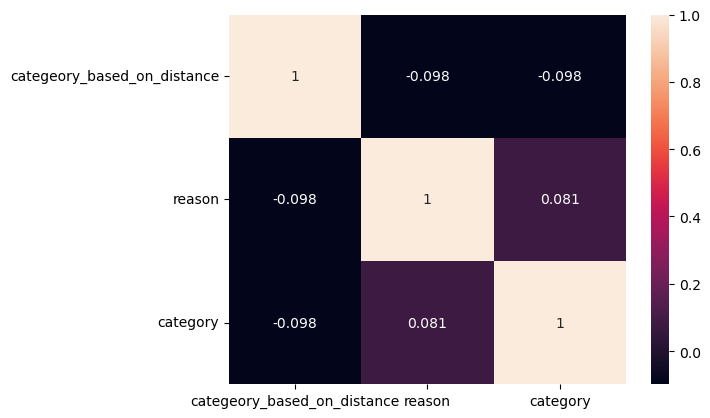

In [75]:
# Correlation of the dataset
correlation = scdata.corr()
sns.heatmap(correlation,annot = True)

In [76]:
# KMeans Clustering

from sklearn.cluster import KMeans
# for determing K (Elbow curve)
k_vals = np.arange(3,15)
wss = []
for i in k_vals:
  kmodel = KMeans(n_clusters = i)
  kmodel.fit(scdata)
  wss.append([i,kmodel.inertia_])

print(wss)

[[3, 6852.686205029736], [4, 4968.468609444568], [5, 3703.387962981871], [6, 2892.0577030894797], [7, 2574.85811962163], [8, 2338.006959750895], [9, 2113.100032731374], [10, 1933.8411989491985], [11, 1774.2189964143456], [12, 1618.2390602880744], [13, 1462.4135723674794], [14, 1336.562955168794]]


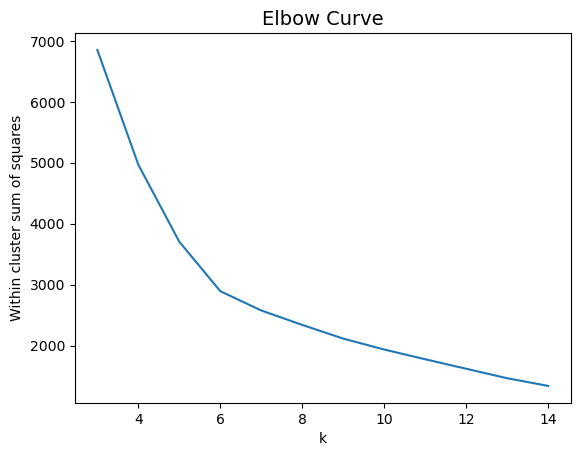

In [77]:
wss = pd.DataFrame(wss, columns = ['k', 'WSS'])

sns.lineplot(x = 'k', y = 'WSS', data = wss)
plt.ylabel('Within cluster sum of squares')
plt.title('Elbow Curve', fontsize = 14,)
plt.show()

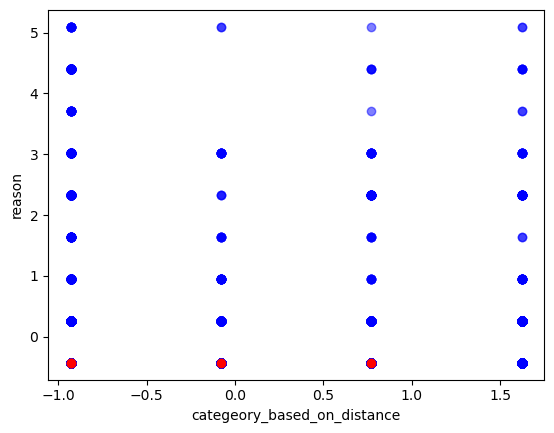

In [78]:
K=4
Centroids = (scdata.sample(n=K))
plt.scatter(scdata["categeory_based_on_distance"],scdata["reason"],c='blue', alpha=0.5)
plt.scatter(Centroids["categeory_based_on_distance"],Centroids["reason"],c='red')
plt.xlabel('categeory_based_on_distance')
plt.ylabel('reason')
plt.show()

In [79]:
# Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering
agc = AgglomerativeClustering(n_clusters=4)
model = agc.fit(scdata)
model.labels_

array([1, 1, 1, ..., 0, 1, 0], dtype=int64)

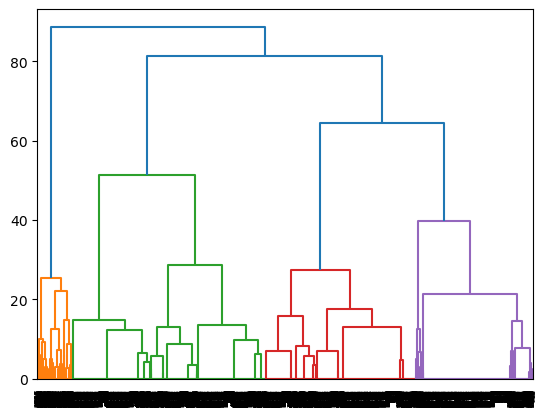

In [80]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_data = linkage(scdata, method='ward', metric='euclidean')
dendrogram(linkage_data)

plt.show()

## Financial analysis with visualization

[Text(0.5, 0, 'Total Trip Cost'), Text(0, 0.5, 'Distance travelled')]

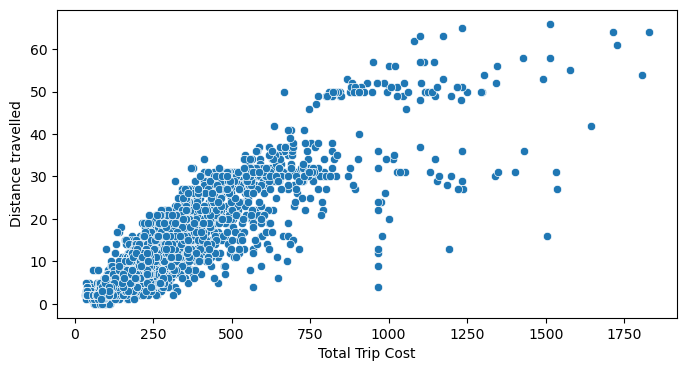

In [81]:
plt.figure(figsize=(8,4))
fig1 = sns.scatterplot(data = df, x=df['total_trip_cost'], y = df['distance_travelled'] )
fig1.set(xlabel = 'Total Trip Cost', ylabel = 'Distance travelled')

<Figure size 2000x400 with 0 Axes>

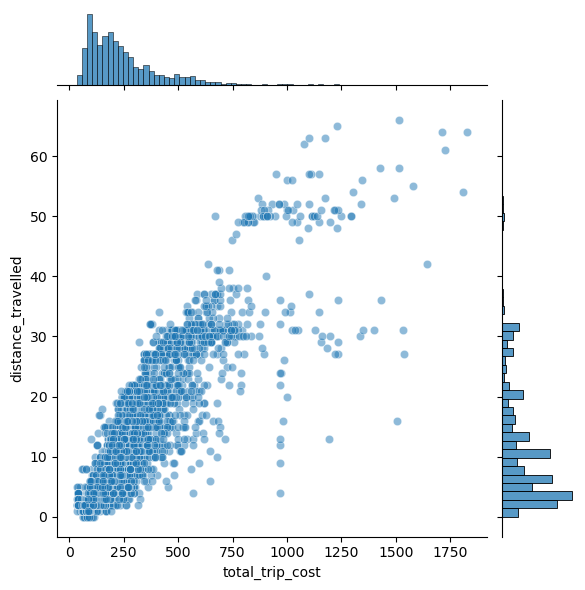

In [82]:
fig2 = plt.figure(figsize= (20,4))
fig2 = sns.jointplot(data= df,x = df['total_trip_cost'],y=df['distance_travelled'], alpha=0.5, palette="muted")

In [83]:
df_cl = df[['commission_base_cost', 'driver_base_cost', 'total_tax', 'total_trip_cost','distance_travelled','time_taken']]
df_cl.head(3)

,commission_base_cost,driver_base_cost,total_tax,total_trip_cost,distance_travelled,time_taken
0,57.73,230.91,21.94,311.00,17,58.0
1,52.04,208.16,19.76,279.96,18,43.0
2,19.70,78.81,7.49,106.00,2,5.0


In [84]:
df_cl.shape

(4950, 6)

In [85]:
# Scaling down the dataset

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

datasc = scaler.fit_transform(df_cl)

In [86]:
datasc = pd.DataFrame(datasc)
datasc.columns = ['commission_base_cost', 'driver_base_cost', 'total_tax', 'total_trip_cost','distance_travelled','time_taken']

datasc.describe()

,commission_base_cost,driver_base_cost,total_tax,total_trip_cost,distance_travelled,time_taken
count,4.950000e+03,4.950000e+03,4.950000e+03,4.950000e+03,4.950000e+03,4.950000e+03
mean,-6.017633e-17,-3.023395e-17,3.489913e-17,2.468732e-16,9.938178e-17,5.963804e-17
std,1.000101e+00,1.000101e+00,1.000101e+00,1.000101e+00,1.000101e+00,1.000101e+00
min,-1.281202e+00,-1.095197e+00,-1.104380e+00,-1.104908e+00,-1.133079e+00,-1.372631e+00
25%,-6.722083e-01,-6.777924e-01,-6.775099e-01,-6.785913e-01,-7.461424e-01,-1.099091e+00
50%,-2.687246e-01,-2.897727e-01,-2.794444e-01,-2.861865e-01,-3.108389e-01,-4.929095e-03
75%,2.939050e-01,2.994339e-01,2.989133e-01,3.036319e-01,4.146668e-01,5.812288e-01
max,8.388410e+00,7.553367e+00,7.686378e+00,7.586714e+00,5.251372e+00,6.130191e+00


<AxesSubplot:>

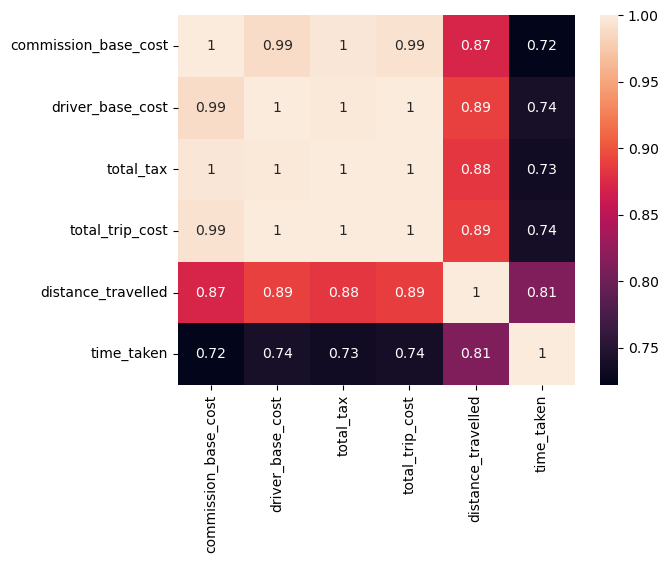

In [87]:
# Correlation of the dataset
correlation = datasc.corr()
sns.heatmap(correlation,annot = True)

In [88]:
# K Means Clustering

# for determing K (Elbow curve)
k_vals = np.arange(3,15)
wss = []
for i in k_vals:
  kmodel = KMeans(n_clusters = i)
  kmodel.fit(datasc)
  wss.append([i,kmodel.inertia_])

print(wss)


[[3, 8027.108140242173], [4, 4901.148853722569], [5, 3752.9239010055385], [6, 3225.592332986855], [7, 2870.0750545864794], [8, 2598.5380545408734], [9, 2433.297703336667], [10, 2220.6089812545924], [11, 2090.0850663856495], [12, 1959.39607557664], [13, 1864.1515579768522], [14, 1771.8553341410059]]


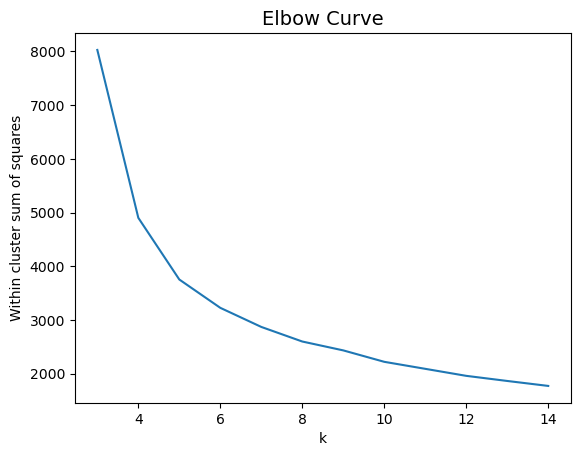

In [89]:
wss = pd.DataFrame(wss, columns = ['k', 'WSS'])

sns.lineplot(x = 'k', y = 'WSS', data = wss)
plt.ylabel('Within cluster sum of squares')
plt.title('Elbow Curve', fontsize = 14)
plt.show()

In [90]:
# Hierarchical Clustering
from sklearn.cluster import AgglomerativeClustering
agc = AgglomerativeClustering(n_clusters=4)
model = agc.fit(datasc)
model.labels_

array([1, 1, 3, ..., 1, 1, 3], dtype=int64)

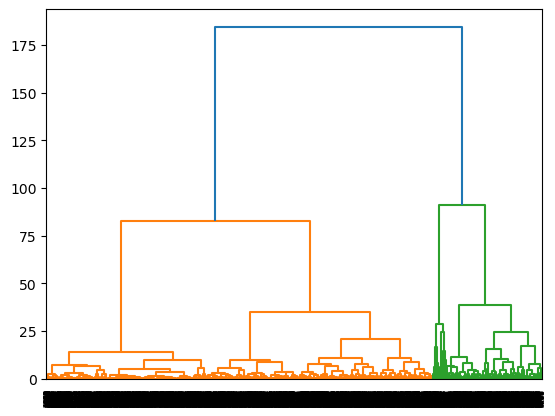

In [91]:
from scipy.cluster.hierarchy import dendrogram, linkage

linkage_data = linkage(datasc, method='ward', metric='euclidean')
dendrogram(linkage_data)

plt.show()

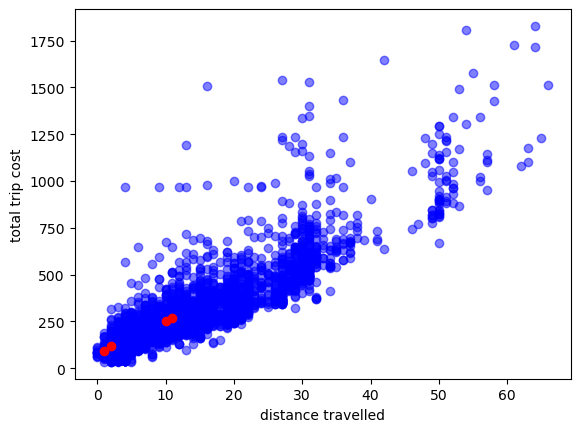

In [92]:
K=4
Centroids = (df.sample(n=K))
plt.scatter(df["distance_travelled"],df["total_trip_cost"],c='blue',alpha = 0.5)
plt.scatter(Centroids["distance_travelled"],Centroids["total_trip_cost"],c='red')
plt.xlabel('distance travelled')
plt.ylabel('total trip cost')
plt.show()